In [1]:
KA=13 #m/d
KC= 9 #m/d
Q = 0.008*24 #m^3/d
w = 1 #m
b = 18 #m

gradhA = -Q/(KA*b*w)
gradhC = -Q/(KC*b*w)

print("gradhA :",round(-gradhA,3))
print("gradhC :",round(-gradhC,3))

hab = 6.0+gradhA*600
hbc = 2.5-gradhC*300

print("hab :",round(hab,3)," meters")
print("hbc :",round(hbc,3)," meters")

KB = -Q/(b*w*((hbc-hab)/800))

print("KB :",round(KB,3)," meters/day")

gradhA : 0.001
gradhC : 0.001
hab : 5.508  meters
hbc : 2.856  meters
KB : 3.218  meters/day


In [2]:
# Find total discharge per unit area through entire formation
htop=33
hbot=21
k1=0.0002
k2=0.000005
k3=0.001
l1=50
l2=20
l3=210
n1=0.30
n2=0.42
n3=0.35
Kbar=(l1+l2+l3)/((l1/k1) + (l2/k2) + (l3/k3))
print("vertical composite Kv: ",round(Kbar,6)," ft/sec")
dH=htop - hbot
dl = l1+l2+l3
qt=Kbar*dH/dl
print("vertical hydraulic gradient :",round(dH/dl,6)," ft/ft")
print("vertical specific discharge q: ",round(qt,6)," ft/sec")

vertical composite Kv:  6.3e-05  ft/sec
vertical hydraulic gradient : 0.042857  ft/ft
vertical specific discharge q:  3e-06  ft/sec


In [3]:
# find head loss in layer 1
dh1 = l1*qt/k1
h12 = htop -dh1
print("head at layer 1-2 interface :",round(h12,2)," ft ")

head at layer 1-2 interface : 32.33  ft 


In [4]:
# find head loss in layer 2
dh2 = l2*qt/k2
h23 = htop - dh1 -dh2
print("head at layer 2-3 interface :",round(h23,2)," ft ")

head at layer 2-3 interface : 21.57  ft 


In [5]:
# time in layer 1
time1 = l1*n1/qt
print("tracer time in layer 1 :",round(time1,6)," sec")

tracer time in layer 1 : 5575000.0  sec


In [6]:
# time in layer 2
time2 = l2*n2/qt
print("tracer time in layer 2 :",round(time2,6)," sec")

tracer time in layer 2 : 3122000.0  sec


In [7]:
# time in layer 3
time3 = l3*n3/qt
print("tracer time in layer 3 :",round(time3,6)," sec")

tracer time in layer 3 : 27317500.0  sec


In [8]:
totaltime=time1+time2+time3
totaltime=totaltime/86400
print("Tracer travel time :",round(totaltime,3)," days ")

Tracer travel time : 416.834  days 


In [9]:
distance = 75 #m
velocity = 1.0 #m/day
retardation = 2.0 #given

timet075 = distance*retardation/velocity

print("time to 75 meters :",round(timet075,3)," days")

time to 75 meters : 150.0  days


In [10]:
def c3addinst(x,y,z,t,m,dx,dy,dz,v,lm):
# Baetsle 1969 model eq. 6.28
    import math
    term0 = math.exp(-1.0*lm*t)
#    term1 = 4.0*((math.pi*t)**(2/2))*math.sqrt(dx*dy)
    term1 = 8.0*((math.pi*t)**(3/2))*math.sqrt(dx*dy*dz)
    term2 = math.exp(-((x-v*t)**2)/(4.0*dx*t) -((y)**2)/(4.0*dy*t) -((z)**2)/(4.0*dz*t))
    c3addinst = term0*(mass/term1)*term2
    return(c3addinst)

def c2addinst(x,y,z,t,m,dx,dy,dz,v,lm):
# dz is not used, preserved to make cut-and-paste same eq 6.27
# Baetsle 1969 model
    import math
    term0 = math.exp(-1.0*lm*t)
    term1 = 4.0*((math.pi*t)**(2/2))*math.sqrt(dx*dy)
    term2 = math.exp(-((x-v*t)**2)/(4.0*dx*t) -((y)**2)/(4.0*dy*t) )
    c2addinst = term0*(mass/term1)*term2
    return(c2addinst)

In [11]:
Co = 1000 #mg/L note problem presents in micrograms/L
Ao = 10 
mass        = Co*Ao #kg
velocity    = 1.0/retardation #m/day
disp_x = 1.0  #m^2/day
disp_y = 0.1 #m^2/day
disp_z = 0.1 #m^2/day
decay = 0.0005 #1/day

print("            Mass : ",round(mass,3)," kg/m^3")
print("Species velocity : ",round(velocity,3)," m/day")
print("    Dispersion x : ",round(disp_x,3)," m^2/day")
print("    Dispersion y : ",round(disp_y,3)," m^2/day")
print("    Dispersion z : ",round(disp_z,3)," m^2/day")

            Mass :  10000  kg/m^3
Species velocity :  0.5  m/day
    Dispersion x :  1.0  m^2/day
    Dispersion y :  0.1  m^2/day
    Dispersion z :  0.1  m^2/day


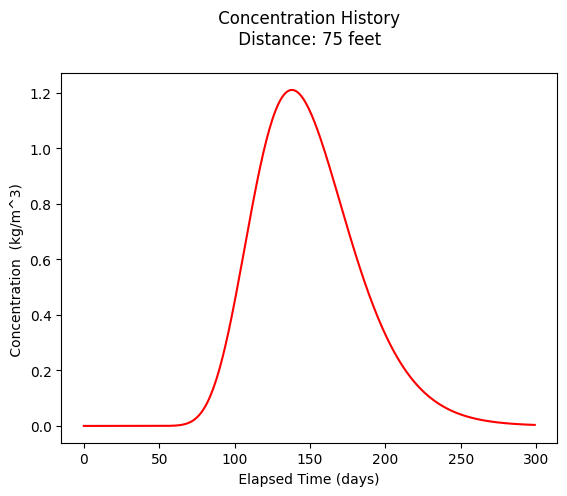

In [12]:
deltat      = (1.0) #days
howmany =     300/deltat 
howmany = int(howmany)

t = [] #days
for i in range(howmany):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
x        = 75  #ft
y        = 0
z        = 0

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c3addinst(x,y,z,t[i],mass,disp_x,disp_y,disp_z,velocity,decay)


#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(x) + " feet \n" ) # caption the plot object
plt.xlabel(" Elapsed Time (days) ") # label x-axis
plt.ylabel(" Concentration  (kg/m^3)      ") # label y-axis
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here

In [13]:
print("Maximum concentration : ",round(max(c),3)," mg/L")
print("          Observed at : ",t[c.index(max(c))]," days")

Maximum concentration :  1.211  mg/L
          Observed at :  138.0  days


In [14]:
import math

sigma_x = math.sqrt(2*disp_x*365)
sigma_y = math.sqrt(2*disp_y*365)


print("x dimension : ",round(3*sigma_x,2)," meters ")
print("y dimension : ",round(3*sigma_y,2)," meters ")

x dimension :  81.06  meters 
y dimension :  25.63  meters 


In [15]:
#
# prototype decaying species function
#
def c1dadrd(c_source,space,time,dispersion,velocity,retardation,decay):
    from math import sqrt,erf,erfc,exp  # get special math functions
    dee = dispersion/retardation
    vee = velocity/retardation
    uuu = (vee**2 + 4.0*decay*dee)
    uuu = sqrt(uuu)
    arg1 = (space*(vee-uuu))/(2.0*dee)
    arg2 = (space - uuu*time)/(2.0*sqrt(dee*time))
    arg3 = (space*(vee+uuu))/(2.0*dee)
    arg4 = (space + uuu*time)/(2.0*sqrt(dee*time))
    temp1 = c_source/2.0
    temp2 = exp(arg1)
    temp3 = erfc(arg2)
    temp4 = exp(arg3)
    temp5 = erfc(arg4)
    
    c1dadrd = temp1*(temp2*temp3+temp4*temp5)
    
    return c1dadrd

In [16]:
# input data manager
conc_c = 10.0 #mg/L
velocity = 0.20 #cm/min
dispersivity = 4.0 #cm
dispersion = dispersivity*velocity
length = 30.0 #cm
print("        ---- Supplied Values ----  ")
print("            Pore Velocity : ",round(velocity,3)," cm/min" )
print("             Dispersivity : ",dispersivity," cm ")
print("          Outlet Distance : ",round(length,3)," cm ")
print("        ---- Computed Values ----  ")
print("               Dispersion : ",round(dispersion,3)," cm^2/min ")

        ---- Supplied Values ----  
            Pore Velocity :  0.2  cm/min
             Dispersivity :  4.0  cm 
          Outlet Distance :  30.0  cm 
        ---- Computed Values ----  
               Dispersion :  0.8  cm^2/min 


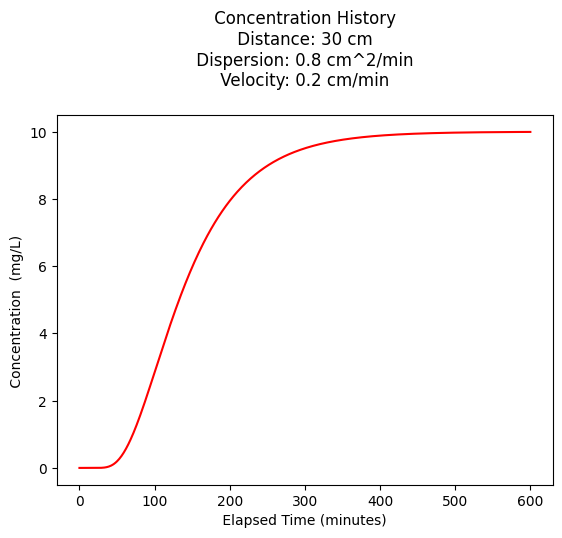

In [17]:
deltat      = (1.0) #minutes
howmany =     601/deltat 
howmany = int(howmany)

t = [] #days
for i in range(howmany):
    t.append(float(i)*deltat)
    if t[i] == 0: # trap zero time to prevent divide by zero
        t[i]= 0.00000001
    
distance        = 30  #cm

c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=c1dadrd(conc_c,distance,t[i],dispersion,velocity,1,0)

#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History \n Distance: " + repr(distance) + " cm \n" + " Dispersion: " + repr(dispersion) + " cm^2/min \n" + " Velocity: " + repr(velocity) + " cm/min \n") # caption the plot object
plt.xlabel(" Elapsed Time (minutes) ") # label x-axis
plt.ylabel(" Concentration  (mg/L)      ") # label y-axis
#plt.plot([365,365],[0,c0])
#plt.plot([365*2,365*2],[0,c0])
#plt.text(365,100,"  year 1")
#plt.text(365*2,100,"  year 2")
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use
#print("Center of Distribution Position : ",round(time*velocity,2)," length units")

In [18]:
print("Concentration observed at",t[c.index(c[90])]," minutes : ",round(c[90],3)," mg/L ")

Concentration observed at 90.0  minutes :  2.159  mg/L 


In [19]:
rhob=1.6 #g/cc
pors=0.40
kaydee = 0.84 #1000cc/1000g
retardation = 1+(rhob/pors)*kaydee
print("Retardation coefficient for Toluene : ",round(retardation,3))

Retardation coefficient for Toluene :  4.36


In [20]:
# time to 5 meters
velocity = 95/365 #cm/day
distance = 5
timeTo5 = distance*retardation/velocity
print("Time to travel 5 meters (advection only) : ",round(timeTo5,3)," days")

Time to travel 5 meters (advection only) :  83.758  days


In [21]:
def c2addinst(x,y,t,m,dx,dy,vee,r,lm):
# Baetsle 1969 model
    import math
    v=vee/r
    dxx=dx/r
    dyy=dy/r
    term0 = math.exp(-1.0*lm*t)
    term1 = 4.0*math.pi*t*math.sqrt(dxx*dyy)
    term2 = math.exp(    -((x-v*t)**2)/(4.0*dxx*t) - ((y)**2)/(4.0*dyy*t) )
    c2addinst = term0*(mass/term1)*term2
    return(c2addinst)

In [22]:
import math
thickness = 8.5
diameter = 0.6
well_volume = thickness*0.25*math.pi*(diameter**2)
mass = 1000.0
conc_0 = mass/well_volume
mmm = conc_0*thickness*diameter
print("Initial concentration : ",round(conc_0,3))
time1 = 3*30
x1 = 5
y1 = 1.5
alpha_l = 3.5
alpha_t = 0.5
disp_x = velocity*alpha_l #units!
disp_y = velocity*alpha_t
lm = 0.021
c1 = c2addinst(x1,y1,time1,mmm,disp_x,disp_y,velocity,retardation,lm)
print("Field point (x,y,t) : (",x1,",",y1,",",time1,") ")
print("Pore velocity : ",round(velocity,3),"m/d")
print("Dispersion x : ",round(disp_x,3)," m^2/d")
print("Dispersion y : ",round(disp_y,3)," m^2/d")
print("Retardation R : ",round(retardation,3))
print("Decay Lambda : ",round(lm,3)," per day")
print("Concentration : ",round(c1,6)," mg/L")

Initial concentration :  416.091
Field point (x,y,t) : ( 5 , 1.5 , 90 ) 
Pore velocity :  0.26 m/d
Dispersion x :  0.911  m^2/d
Dispersion y :  0.13  m^2/d
Retardation R :  4.36
Decay Lambda :  0.021  per day
Concentration :  1.36939  mg/L
